In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns',None)

In [2]:
# let's start model building
df=pd.read_csv('eda_data.csv')

In [3]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel,job_title,seniority_level,total_competitor
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,0,47,1,0,0,0,1,data scientist,not specified,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,0,36,1,0,0,0,0,data scientist,not specified,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,FL,1,10,1,0,1,0,1,data scientist,not specified,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL,WA,1,55,1,0,0,0,0,data scientist,not specified,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions,NY,1,22,1,0,0,0,1,data scientist,not specified,3


In [4]:
model_data=df[['avg_salary','Headquarters','Rating','Size','Type of ownership','Industry','Sector','hourly','employer_provided','job_state','same_state','age','python_yn','spark','aws','excel','job_title','seniority_level','total_competitor']]

In [5]:
# let's convert all the categorical data into numerical data for model building
df_dummies = pd.get_dummies(model_data)

In [6]:
df_dummies.head()

,avg_salary,Rating,hourly,employer_provided,same_state,age,python_yn,spark,aws,excel,total_competitor,Headquarters_-1,"Headquarters_Akron, OH","Headquarters_Alameda, CA","Headquarters_Alexandria, VA","Headquarters_Ann Arbor, MI","Headquarters_Annapolis Junction, MD","Headquarters_Arlington, TX","Headquarters_Arlington, VA","Headquarters_Atlanta, GA","Headquarters_Atlanta, IN","Headquarters_Aurora, CO","Headquarters_Austin, TX","Headquarters_Baltimore, MD","Headquarters_Basel, Switzerland","Headquarters_Bedford, MA","Headquarters_Beijing, China","Headquarters_Bengaluru, India","Headquarters_Bentonville, AR","Headquarters_Bethesda, MD","Headquarters_Birmingham, AL","Headquarters_Bloomington, IL","Headquarters_Blue Bell, PA","Headquarters_Boise, ID","Headquarters_Boston, MA","Headquarters_Brea, CA","Headquarters_Brentford, United Kingdom","Headquarters_Brisbane, CA","Headquarters_Burbank, CA","Headquarters_Cambridge, MA","Headquarters_Cambridge, United Kingdom","Headquarters_Campbell, CA","Headquarters_Canton, MI","Headquarters_Carle Place, NY","Headquarters_Cedar Rapids, IA","Headquarters_Centennial, CO","Headquarters_Chadds Ford, PA","Headquarters_Chandler, AZ","Headquarters_Chantilly, VA","Headquarters_Charlotte, NC","Headquarters_Chattanooga, TN","Headquarters_Cherry Hill, NJ","Headquarters_Chicago, IL","Headquarters_Cincinnati, OH","Headquarters_Clearwater, FL","Headquarters_Columbia, MO","Headquarters_Concord, CA","Headquarters_Coraopolis, PA","Headquarters_Dallas, TX","Headquarters_Daly City, CA","Headquarters_Dayton, OH","Headquarters_Decatur, AL","Headquarters_Deerfield, IL","Headquarters_Denver, CO","Headquarters_Des Moines, IA","Headquarters_Detroit, MI","Headquarters_Dublin, CA","Headquarters_Durham, NC","Headquarters_Englewood, CO","Headquarters_Ewing, NJ","Headquarters_Exton, PA","Headquarters_Fairfax, VA","Headquarters_Falls Church, VA","Headquarters_Flower Mound, TX","Headquarters_Fort Lauderdale, FL","Headquarters_Fort Lee, NJ","Headquarters_Fort Mill, SC","Headquarters_Fort Worth, TX","Headquarters_Foster City, CA","Headquarters_Framingham, MA","Headquarters_Franklin, TN","Headquarters_Frederick, MD","Headquarters_Fremont, CA","Headquarters_Goleta, CA","Headquarters_Gottingen, Germany","Headquarters_Green Bay, WI","Headquarters_Hamilton, Bermuda","Headquarters_Hamilton, NJ","Headquarters_Harrisburg, PA","Headquarters_Herndon, VA","Headquarters_Highland, CA","Headquarters_Holyoke, MA","Headquarters_Houston, TX","Headquarters_Huntsville, AL","Headquarters_Indianapolis, IN","Headquarters_Ipswich, MA","Headquarters_Irvine, CA","Headquarters_Jacksonville, FL","Headquarters_Kansas City, MO","Headquarters_Knoxville, TN","Headquarters_Lake Forest, IL","Headquarters_Laurel, MD","Headquarters_Lewes, DE","Headquarters_Lincoln, NE","Headquarters_Logan, UT","Headquarters_London, United Kingdom","Headquarters_Long Beach, NY","Headquarters_Lorton, VA","Headquarters_Los Angeles, CA","Headquarters_Louvain-la-Neuve, Belgium","Headquarters_Lowell, MA","Headquarters_Lynchburg, VA","Headquarters_Lyndhurst, NJ","Headquarters_Madison, WI","Headquarters_Madrid, Spain","Headquarters_Marlborough, MA","Headquarters_Mc Lean, VA","Headquarters_Memphis, TN","Headquarters_Miami, FL","Headquarters_Mill Valley, CA","Headquarters_Milwaukee, WI","Headquarters_Minneapolis, MN","Headquarters_Morrisville, NC","Headquarters_Mountain View, CA","Headquarters_Mumbai, India","Headquarters_Nashville, TN","Headquarters_Natick, MA","Headquarters_New Orleans, LA","Headquarters_New Plymouth, ID","Headquarters_New York, NY","Headquarters_Newark, NJ","Headquarters_Newton, MA","Headquarters_Noida, India","Headquarters_North Brunswick, NJ","Headquarters_North Salt Lake, UT","Headquarters_Norwalk, CT","Headquarters_OSAKA, Japan","Headquarters_Omaha, NE","Headquarters_Orange, CA","Headquarters_Orlando, FL","Headquarters_Palo Alto, CA","Headquarters_Paris, France","Headquarters_Peachtree City, GA","Headquarters_Peachtree Corners, GA","Headquarters_Pella, IA","Headqu

In [7]:
X = df_dummies.drop(['avg_salary'],axis=1)
y = df_dummies['avg_salary']

In [8]:
#splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=42)

In [9]:
import statsmodels.api as sm

x_sm = sm.add_constant(X)
model = sm.OLS(y,x_sm)
model.fit().summary()

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_salary   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     9.508
Date:                Tue, 23 Aug 2022   Prob (F-statistic):           7.70e-96
Time:                        18:18:31   Log-Likelihood:                -3025.6
No. Observations:                 742   AIC:                             6649.
Df Residuals:                     443   BIC:                             8027.
Df Model:                         298                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                20.1618      8.469      2.381      0.018       3.518      36.805
Rating                                                9.7526      3.306      2.950      0.003       3.255      16.250
hourly                                              -44.3816     15.078     -2.944      0.003     -74.014     -14.749
employer_provided                                    41.9977     12.403      3.386      0.001      17.621      66.374
same_state                                           -7.5600      3.817     -1.981      0.048     -15.062      -0.058
age                                                   0.2134      0.069      3.099      0.002       0.078       0.349
python_yn                                             2.2811      2.869      0.795      0.427      -3.357       7.920
spark                                                -4.3384      3.292     -1.318      0.188     -10.807       2.131
aws                                                  -1.5606      3.250     -0.480      0.631      -7.949       4.828
excel                                                 0.5016      2.526      0.199      0.843      -4.463       5.466
total_competitor                                      3.3444      1.311      2.552      0.011       0.769       5.920
Headquarters_-1                                      28.7317      9.195      3.125      0.002      10.660      46.803
Headquarters_Akron, OH                               16.6850     15.663      1.065      0.287     -14.099      47.469
Headquarters_Alameda, CA                            -44.0202     15.712     -2.802      0.005     -74.899     -13.142
Headquarters_Alexandria, VA                           4.8964     13.609      0.360      0.719     -21.849      31.642
Headquarters_Ann Arbor, MI                          -22.2034     15.385     -1.443      0.150     -52.440       8.034
Headquarters_Annapolis Junction, MD                  20.3609     14.733      1.382      0.168      -8.594      49.316
Headquarters_Arlington, TX                           -0.8798     35.525     -0.025      0.980     -70.697      68.938
Headquarters_Arlington, VA                           -0.2462     12.636     -0.019      0.984     -25.080      24.588
Headquarters_Atlanta, GA                            -18.2998     14.956     -1.224      0.222     -47.694      11.095
Headquarters_Atlanta, IN                             -5.0821      7.418     -0.685      0.494     -19.662       9.497
Headquarters_Aurora, CO                             -34.4397     30.211     -1.140      0.255     -93.814      24.935
Headquarters_Austin, TX                               5.9613     24.663      0.242      0.809     -42.510      54.433
Headquarters_Ba

## 1. Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
l_reg = LinearRegression()

In [12]:
l_reg.fit(X_train,y_train)

LinearRegression()

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
np.mean(cross_val_score(l_reg,X_train,y_train, scoring = 'neg_mean_absolute_error',cv=3))

-28422312741.785954

## 2. Lasso Regression

In [15]:
from sklearn.linear_model import Lasso

In [16]:
lasso_reg = Lasso(alpha=0.2)

In [17]:
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.2)

In [18]:
np.mean(cross_val_score(lasso_reg,X_train,y_train, scoring = 'neg_mean_absolute_error',cv=3))

-19.240501809562478

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.642e+01, tolerance: 5.393e+01
  model = cd_fast.enet_coordinate_descent(


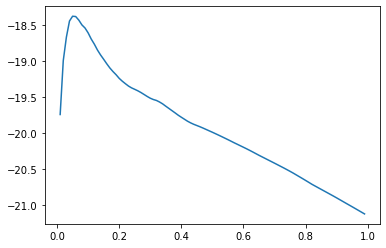

In [19]:
#checking out the corrct value for alpha
alpha = []
error = []
for i in range(1,100):
    alpha.append(i/100) #we are dividng by 100, because thats how we will get the smallest value of alpha according to the graph
    LR = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(LR,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
plt.plot(alpha,error)    

In [20]:
#according to this graph we are getting min error when alpha = 0.05

In [21]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
4,0.05,-18.377594


In [22]:
lasso_reg1 = Lasso(alpha=0.05)
lasso_reg1.fit(X_train,y_train)
np.mean(cross_val_score(lasso_reg1,X_train,y_train, scoring = 'neg_mean_absolute_error',cv=3))

-18.37759376906538

## 3rd Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
np.mean(cross_val_score(rf,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-15.385561259910588

In [24]:
#doing hyper parameter tuning
#gonna use grid search cv
from sklearn.model_selection import GridSearchCV

In [25]:
parameters = {
              'criterion':('mse','mae'),
              'max_features':('auto','sqrt','log2')
             }

In [26]:
gs = GridSearchCV(rf,parameters,cv=3,scoring='neg_mean_absolute_error')
gs.fit(X_train,y_train)

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2')},
             scoring='neg_mean_absolute_error')

In [27]:
print(gs.best_score_)
print(gs.best_estimator_)

-15.324064298169139
RandomForestRegressor(criterion='mae')


In [29]:
##doing on testing data
lr_pred_y = l_reg.predict(X_test)
#lasso_pred_y = lasso_reg1(X_test)
rf_pred_y = gs.best_estimator_.predict(X_test)

In [32]:
from sklearn.metrics import mean_absolute_error
print('for linear regresson:',mean_absolute_error(y_test,lr_pred_y))
#mean_absolute_error(y_test,tpred_lml)
print('For Random Forest:',mean_absolute_error(y_test,rf_pred_y))

for linear regresson: 11877161527.574009
For Random Forest: 11.514220430107526


Since Random Forest is doing better than the rest.Therefore we are going to use Random Forest

In [34]:
from sklearn.metrics import r2_score
print('R2 score for Random Forest:',r2_score(y_test,rf_pred_y))

R2 score for Random Forest: 0.777226282875967


In [35]:
import pickle

In [ ]:
picle={'model':GS.best_estimator_}
pickle.dump(picle, open('model_file' + ".p","wb"))
file_name="model_file.p"
with open(file_name, 'rb') as pickled:
        data = pickle.load(pickled)
        model = data['model']
model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]


list(X_test.iloc[1,:])

In [36]:
model = {'model':gs.best_estimator_}
pickle.dump(model,open('ds_salary_model_file' + ".p","wb")) #this will create the model in a differnt file

In [41]:
#to open the model file for prediction
file_name = 'ds_salary_model_file.p'
with open(file_name,'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']
model.predict(np.array(list(X_test.iloc[5,:])).reshape(1,-1))[0]

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


112.785

In [42]:
(y_test.iloc[5])

107.0